In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import tempfile
import zipfile

temp_dir = tempfile.TemporaryDirectory()
print(temp_dir)

<TemporaryDirectory 'C:\\Users\\andre\\AppData\\Local\\Temp\\tmpzrffdrqp'>


In [4]:
with zipfile.ZipFile('dataset.zip', 'r') as zip:
    zip.extractall(temp_dir.name)

In [5]:
#estrutura da rede neural
clf = Sequential()
clf.add(InputLayer(shape=(64, 64, 3)))#imagens 64x64 e coloridas(3)
clf.add(Conv2D(filters= 32, kernel_size=(3,3), activation='relu'))#camadas de convolução(32), kernel_size(tamanho do detector de caracteristicas)
clf.add(BatchNormalization())
clf.add(MaxPooling2D(pool_size=(2,2)))

clf.add(Conv2D(filters= 32, kernel_size=(3,3), activation='relu'))#camadas de convolução(32), kernel_size(tamanho do detector de caracteristicas)
clf.add(BatchNormalization())
clf.add(MaxPooling2D(pool_size=(2,2)))

clf.add(Flatten())

clf.add(Dense(units=128, activation='relu'))
clf.add(Dropout(0.2))
clf.add(Dense(units=128, activation='relu'))
clf.add(Dropout(0.2))

clf.add(Dense(units=1, activation='sigmoid'))#1 pois é classificação binaria

In [6]:
clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 829,985 (3.17 MB)

 Trainable params: 829,857 (3.17 MB)

 Non-trainable params: 128 (512.00 B)

In [7]:
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
gerador_treinamento = ImageDataGenerator(rescale=1./255, rotation_range=7,
                                         horizontal_flip=True, shear_range=0.2,
                                         height_shift_range=0.07, zoom_range=0.2)

In [9]:
gerador_teste = ImageDataGenerator(rescale=1./255)

In [10]:
base_treinamento = gerador_treinamento.flow_from_directory(f'{temp_dir.name}/dataset/training_set',
                                                           target_size=(64,64),
                                                           batch_size=32, class_mode='binary')

Found 4000 images belonging to 2 classes.


In [11]:
base_teste = gerador_teste.flow_from_directory(f'{temp_dir.name}/dataset/test_set',
                                                target_size=(64,64),
                                                batch_size=32, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [12]:
clf.fit(base_treinamento, epochs=10, validation_data=base_teste)

Epoch 1/10


c:\Users\andre\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 47s 342ms/step - accuracy: 0.5691 - loss: 0.9578 - val_accuracy: 0.5000 - val_loss: 1.2075
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - accuracy: 0.6131 - loss: 0.6714 - val_accuracy: 0.5650 - val_loss: 0.9402
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - accuracy: 0.6629 - loss: 0.6279 - val_accuracy: 0.6500 - val_loss: 0.6418
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 140ms/step - accuracy: 0.6799 - loss: 0.6009 - val_accuracy: 0.6550 - val_loss: 0.6421
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - accuracy: 0.7036 - loss: 0.5714 - val_accuracy: 0.6550 - val_loss: 0.6104
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 138ms/step - accuracy: 0.7077 - loss: 0.5632 - val_accuracy: 0.5810 - val_loss: 0.7337
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - accuracy: 0.7111 - loss: 0.5594 - val_accuracy: 0.6950 - val_loss: 0.6122
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - accuracy: 0.7202 - loss: 0.5359 - val

In [29]:
imagem_teste = image.load_img(f'{temp_dir.name}/dataset/test_set/cachorro/dog.3516.jpg', target_size=(64,64))

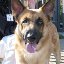

In [30]:
imagem_teste

In [31]:
type(imagem_teste)

PIL.Image.Image

In [32]:
imagem_teste = image.img_to_array(imagem_teste)

In [33]:
imagem_teste

array([[[ 29.,  34.,  40.],
        [ 11.,  14.,  19.],
        [ 31.,  30.,  35.],
        ...,
        [151., 143., 122.],
        [163., 160., 151.],
        [205., 212., 218.]],

       [[ 24.,  29.,  35.],
        [ 24.,  27.,  32.],
        [ 21.,  20.,  25.],
        ...,
        [115., 109.,  77.],
        [161., 159., 147.],
        [205., 212., 220.]],

       [[  8.,  13.,  19.],
        [  8.,  11.,  16.],
        [ 12.,  11.,  16.],
        ...,
        [127., 123.,  76.],
        [160., 158., 145.],
        [201., 207., 219.]],

       ...,

       [[150., 129., 134.],
        [170., 163., 157.],
        [184., 188., 191.],
        ...,
        [183., 175., 172.],
        [233., 226., 220.],
        [240., 233., 225.]],

       [[124.,  94., 104.],
        [156., 152., 149.],
        [212., 225., 231.],
        ...,
        [102., 104.,  99.],
        [105., 107., 104.],
        [104., 105., 107.]],

       [[150., 138., 138.],
        [163., 165., 152.],
        [208., 2

In [34]:
imagem_teste /= 255

In [35]:
imagem_teste

array([[[0.11372549, 0.13333334, 0.15686275],
        [0.04313726, 0.05490196, 0.07450981],
        [0.12156863, 0.11764706, 0.13725491],
        ...,
        [0.5921569 , 0.56078434, 0.47843137],
        [0.6392157 , 0.627451  , 0.5921569 ],
        [0.8039216 , 0.83137256, 0.85490197]],

       [[0.09411765, 0.11372549, 0.13725491],
        [0.09411765, 0.10588235, 0.1254902 ],
        [0.08235294, 0.07843138, 0.09803922],
        ...,
        [0.4509804 , 0.42745098, 0.3019608 ],
        [0.6313726 , 0.62352943, 0.5764706 ],
        [0.8039216 , 0.83137256, 0.8627451 ]],

       [[0.03137255, 0.05098039, 0.07450981],
        [0.03137255, 0.04313726, 0.0627451 ],
        [0.04705882, 0.04313726, 0.0627451 ],
        ...,
        [0.49803922, 0.48235294, 0.29803923],
        [0.627451  , 0.61960787, 0.5686275 ],
        [0.7882353 , 0.8117647 , 0.85882354]],

       ...,

       [[0.5882353 , 0.5058824 , 0.5254902 ],
        [0.6666667 , 0.6392157 , 0.6156863 ],
        [0.72156864, 0

In [36]:
imagem_teste.shape

(64, 64, 3)

In [37]:
imagem_teste = np.expand_dims(imagem_teste, axis=0)

In [38]:
imagem_teste.shape

(1, 64, 64, 3)

In [39]:
previsao = clf.predict(imagem_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [40]:
previsao

array([[0.25590733]], dtype=float32)

In [41]:
previsao = previsao > 0.5

In [42]:
previsao

array([[False]])

In [43]:
base_treinamento.class_indices

{'cachorro': 0, 'gato': 1}